<a href="https://colab.research.google.com/github/AnuragGorkar/LeNet_CNN_model_using_python/blob/master/CNN_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True,
                                        transform=transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ('PLANE', 'CAR', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
7


#Visualising Data

In [0]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [0]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [0]:
npimg = np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


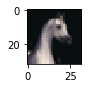

In [0]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow (img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

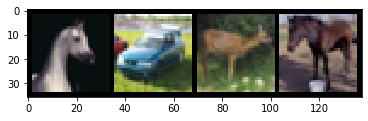

HORSE CAR DEER HORSE


In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# SINGLE CONVOLUTIONAL LAYER 

In [0]:
import torch.nn as nn

In [0]:
class First_CNN(nn.Module):
  def __init__(self):
    super(First_CNN , self).__init__()
    self.conv1 = nn.Conv2d (3, 16, 3, padding =(1,1), stride=(2,2))

  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net = First_CNN()

In [0]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [0]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [0]:
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


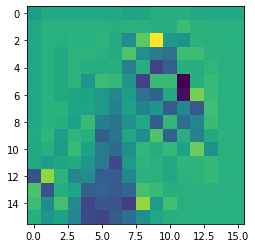

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

#DEEP CONVOLUTIONAL NETWORK

In [0]:
class First_CNN_v2(nn.Module):
  def __init__(self):
    super(First_CNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3),
        nn.Conv2d(8,16,3)
    ) 

  def forward(self, x):
    x = self.model(x)
    return x 

In [0]:
net = First_CNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

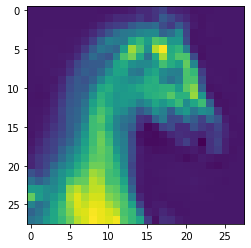

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [0]:
class First_CNN_v3(nn.Module):
  def __init__(self):
    super(First_CNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.AvgPool2d(2, stride = 2),
        nn.Conv2d(6,16,5),
        nn.AvgPool2d(2, stride = 2)
    ) 

  def forward(self, x):
    x = self.model(x)
    return x 

In [0]:
net = First_CNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

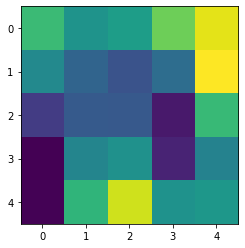

In [0]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), 
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6,16,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  
  def forward(self, x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x

In [0]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[ 0.1132,  0.0526, -0.0498, -0.0751, -0.0066, -0.1297, -0.1433,  0.0093,
          0.0746,  0.0592],
        [ 0.1329,  0.0502, -0.0236, -0.0875,  0.0107, -0.1522, -0.1836, -0.0105,
          0.0507,  0.0399],
        [ 0.1295,  0.0620, -0.0259, -0.0863, -0.0080, -0.1497, -0.1723, -0.0158,
          0.0602,  0.0469],
        [ 0.1171,  0.0526, -0.0265, -0.0864,  0.0170, -0.1508, -0.1776, -0.0101,
          0.0599,  0.0616]], grad_fn=<AddmmBackward>)


In [0]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([0, 0, 0, 0])


#TRAINING LENET


In [0]:
batch_size = 128 